# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



For every column in the data: 

a. State whether the values match the description given in the table above. 

b. State the number of missing values in the column. 

c. Describe what you did to make values match the description if they did not match.

![Criteria](Criteria.png)

In [394]:
#############################
## Importing the necessary libraries
#############################
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install openpyxl
from scipy.stats import kurtosis, skew, mode




Defaulting to user installation because normal site-packages is not writeable


In [395]:
# Load the data
file_path = 'pet_supplies_2212.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure and contents
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [397]:
df.describe()

,product_id,sales,rating,repeat_purchase
count,1500.000000,1500.000000,1350.000000,1500.000000
mean,750.500000,996.597847,4.991111,0.604000
std,433.157015,323.952676,1.559755,0.489228
min,1.000000,286.940000,1.000000,0.000000
25%,375.750000,747.420000,4.000000,0.000000
50%,750.500000,1000.830000,5.000000,1.000000
75%,1125.250000,1158.157500,6.000000,1.000000
max,1500.000000,2255.960000,9.000000,1.000000


In [398]:
df.columns

Index(['product_id', 'category', 'animal', 'size', 'price', 'sales', 'rating',
       'repeat_purchase'],
      dtype='object')

In [399]:
# 1. product_id
# # Check if the criteria have been met
product_id_missing = df['product_id'].isnull().sum()
product_id_unique = df['product_id'].is_unique
product_id_type = df['product_id'].dtype

In [400]:
print(df.columns[0],product_id_missing, product_id_unique,product_id_type)

product_id 0 True int64


In [403]:
#2. category
# Check if the criteria have been met
expected_values = ["Housing", "Food", "Toys", "Equipment", "Medicine", "Accessory"]

category_missing = df['category'].isnull().sum()
category_type = df['category'].dtype
category_incorrect_names= df['category'].apply(lambda x: x not in expected_values).sum()




In [404]:
print(df.columns[1],category_missing,
      category_type,category_incorrect_names,df['category'].unique())

category 0 object 25 ['Food' 'Housing' 'Medicine' 'Toys' 'Equipment' 'Accessory' '-']


In [405]:
# Change the incorrect names
df['category'] = df['category'].apply(lambda x: x if x in expected_values else 'Unknown')

In [406]:
# Check if the change has happened
print(df.columns[1],category_missing,
      category_type,category_incorrect_names,df['category'].unique())

category 0 object 25 ['Food' 'Housing' 'Medicine' 'Toys' 'Equipment' 'Accessory' 'Unknown']


In [407]:
#3. animal
# Check if the criteria have been met
expected_values = ["Dog", "Cat", "Bird", "Fish"]

animal_missing = df['animal'].isnull().sum()
animal_type = df['animal'].dtype
animal_incorrect_names= df['animal'].apply(lambda x: x not in expected_values).sum()

In [408]:
print(df.columns[2],animal_missing,
      animal_type,animal_incorrect_names,df['animal'].unique())

animal 0 object 0 ['Bird' 'Dog' 'Cat' 'Fish']


In [409]:
#4. size
# Check if the criteria have been met
expected_values = ["Small", "Medium", "Large"]

size_missing = df['size'].isnull().sum()
size_type = df['size'].dtype
size_incorrect_names= df['size'].apply(lambda x: x not in expected_values).sum()
size_unique_values = df['size'].unique()

In [410]:
print(df.columns[3],size_missing,
      size_type,size_incorrect_names,size_unique_values)

size 0 object 1050 ['large' 'MEDIUM' 'medium' 'small' 'Small' 'Large' 'SMALL' 'Medium'
 'LARGE']


In [411]:
# Standardize the data
df['size'] = df['size'].str.title()

In [412]:
# Check if the change has happened

size_missing = df['size'].isnull().sum()
size_type = df['size'].dtype
size_incorrect_names= df['size'].apply(lambda x: x not in expected_values).sum()
size_unique_values = df['size'].unique()
print(df.columns[3],size_missing,
      size_type,size_incorrect_names,size_unique_values)

size 0 object 0 ['Large' 'Medium' 'Small']


In [413]:
#5. price
# Check if the criteria have been met
print(df['price'].dtype,'\n',df['price'].head(20))

object 
 0      51.1
1     35.98
2     31.23
3     24.95
4     26.18
5     30.77
6     31.04
7      28.9
8     17.82
9     24.93
10    40.87
11    34.96
12    31.07
13     40.8
14    33.13
15    43.09
16    28.29
17    43.91
18    33.87
19       44
Name: price, dtype: object


In [414]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
negative = (df['price'] < 0).sum()
price_missing = df['price'].isnull().sum()
print(price_missing)

150


In [415]:
# Convert to Numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Check for Negative Values and Missing values
negative_values_count = (df['price'] < 0).sum()
price_missing = df['price'].isnull().sum()

# Replace Missing Values
median_price = df['price'].median()
df['price'].fillna(median_price, inplace=True)

# Round to 2 Decimal Places
df['price'] = df['price'].round(2)

In [416]:
# Check if the change has happened
print(negative_values_count, price_missing,'\n', df['price'].head(20))

0 150 
 0     51.10
1     35.98
2     31.23
3     24.95
4     26.18
5     30.77
6     31.04
7     28.90
8     17.82
9     24.93
10    40.87
11    34.96
12    31.07
13    40.80
14    33.13
15    43.09
16    28.29
17    43.91
18    33.87
19    44.00
Name: price, dtype: float64


In [417]:
#6. sales
# Check if the criteria have been met
print(df['sales'].dtype,'\n',df['sales'].head(20))

float64 
 0     1860.62
1      963.60
2      898.30
3      982.15
4      832.63
5      874.58
6      875.07
7     1074.31
8      503.67
9      838.88
10    1457.22
11    1204.60
12     889.73
13    1450.50
14     859.29
15    1418.72
16    1040.51
17    1521.51
18    1333.90
19    1792.63
Name: sales, dtype: float64


In [418]:
# Check for Negative Values and Missing values
negative_values_count = (df['sales'] < 0).sum()
sales_missing = df['sales'].isnull().sum()

In [419]:
print(negative_values_count, sales_missing)

0 0


In [420]:
# Round to 2 Decimal Places
df['sales'] = df['sales'].round(2)
print(df['sales'])

0       1860.62
1        963.60
2        898.30
3        982.15
4        832.63
         ...   
1495    1203.36
1496    1099.97
1497     724.02
1498     658.66
1499     826.08
Name: sales, Length: 1500, dtype: float64


In [421]:
#7. rating
# Check Data Type
rating_dtype = df['rating'].dtype
# Check Missing values
rating_missing = df['rating'].isnull().sum()
# Check Value Range
rating_value_range = (df['rating'].min(), df['rating'].max())

print(f'Type: {rating_dtype}, Missing Values: {rating_missing}, Range: {rating_value_range}')


Type: float64, Missing Values: 150, Range: (1.0, 9.0)


In [422]:
# Replace Missing Values
df['rating'].fillna(0, inplace=True)

# Values Check
updated_rating_value_range = (df['rating'].min(), df['rating'].max())

rating_dtype, rating_value_range, updated_rating_value_range

(dtype('float64'), (1.0, 9.0), (0.0, 9.0))

In [423]:
#8. repeat_purchase
# Check Data Type
repeat_purchase_dtype = df['repeat_purchase'].dtype
# Check Missing values
repeat_purchase_missing = df['repeat_purchase'].isnull().sum()
# Check Value Range
repeat_purchase_range = (df['repeat_purchase'].min(), df['repeat_purchase'].max())

print(f'Type: {repeat_purchase_dtype}, Missing Values: {repeat_purchase_missing}, Range: {repeat_purchase_range}')

Type: int64, Missing Values: 0, Range: (0, 1)


In [424]:
df['repeat_purchase']

0       1
1       0
2       1
3       1
4       1
       ..
1495    0
1496    0
1497    0
1498    1
1499    1
Name: repeat_purchase, Length: 1500, dtype: int64

**product_id**: There are 1500 unique integer values that match the description given. There are no missing values. 

**category**: There were 1500 nominal values. There were no missing values. There were 25 incorrect names. These 25 incorrect names were changed to 'Unknown'

**animal**: There are 1500 nominal values that match the description given. There are no missing values. 

**size**: There are 1,500 nominal values that match the given description, with no missing values. Among these, 1,050 values did not align with the expected categorical labels: "Small", "Medium", "Large", due to inconsistent capitalization. This inconsistency has been resolved by standardizing the data using the following command: df['size'] = df['size'].str.title().

**price**: The "price" column in our dataset contains continuous data representing the cost of the sold products. Initially, it had 150 missing values, which were replaced with the median price value. The following steps were carried out in a Python environment using the pandas library: first, the "price" column was converted to a numeric data type using the command df['price'] = pd.to_numeric(df['price'], errors='coerce'). Then, a check was performed for any negative values and to tally the missing values. The median price was calculated and used to replace the missing values with the command df['price'].fillna(median_price, inplace=True). Finally, the values in the "price" column were rounded to two decimal places using the command df['price'] = df['price'].round(2) to maintain a consistent level of precision.

**sales**: The “sales” column has a continuous data type and shows the value of all product sales over the last year. I rounded the values to two decimal places using the command df['sales'] = df['sales'].round(2). Upon checking with df['sales'].isnull().sum(), I found no missing values.

**rating**: The “rating” column has a discrete data type and contains the customer ratings of the product, ranging from 1 to 10. A total of 150 missing values were identified, which were subsequently replaced with 0 using the command df['rating'].fillna(0, inplace=True). The number of missing values was determined with rating_missing = df['rating'].isnull().sum()

**repeat_purchase**: There are 1500 nominal values that match the description given. There are no missing values. 

In [425]:
# Verify data cleaning success
#df.to_excel('output.xlsx', index=False)

In [426]:
df.head(20)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
5,6,Housing,Dog,Small,30.77,874.58,7.0,0
6,7,Housing,Dog,Small,31.04,875.07,5.0,0
7,8,Toys,Cat,Medium,28.90,1074.31,4.0,0
8,9,Equipment,Fish,Medium,17.82,503.67,5.0,0
9,10,Medicine,Dog,Medium,24.93,838.88,8.0,0


## Task 2

Create a visualization that shows how many products are repeat purchases.Use the visualization to: 

a. State which category of the variable repeat purchases has the most observations. 

b. Explain whether the observations are balanced across categories of the variable repeat purchases.

![barplot_rep_purch](barplot_rep_purch.png)


![barplot_rep_purch_product](barplot_rep_purch_product.png)


![rep_purch_product](rep_purch_product.png)


First, we examine the distribution of purchases versus non-purchases. The category indicating repeat purchases (1) has more observations (Total: 906) compared to the category of non-repeat purchases (0) (Total: 594). Repeat purchases account for 60.40% of our products while non-repeat purchases account for 39.60% of our products.
The observations are not balanced across these two categories, with the repeat purchase category having a higher count, indicative of an imbalance

Second, upon examining the products more specifically, we observe that:
The "Equipment" category leads with the highest number of repeat purchases (221). It is followed by the "Medicine" category, which has a comparable number of repeat purchases alongside "Housing" and "Food". The "Toys" category comes next, while the "Accessory" category records fewer repeat purchases. The distribution of repeat purchases is not balanced across categories, with "Equipment" registering 221 and "Unknown" registering the lowest at 14. This reflects varying levels of repeat purchasing across different categories.

## Task 3

Describe the distribution of all of the sales.

Your answer must include a visualization that shows the distribution.

![sales_distr](sales_distr.png)


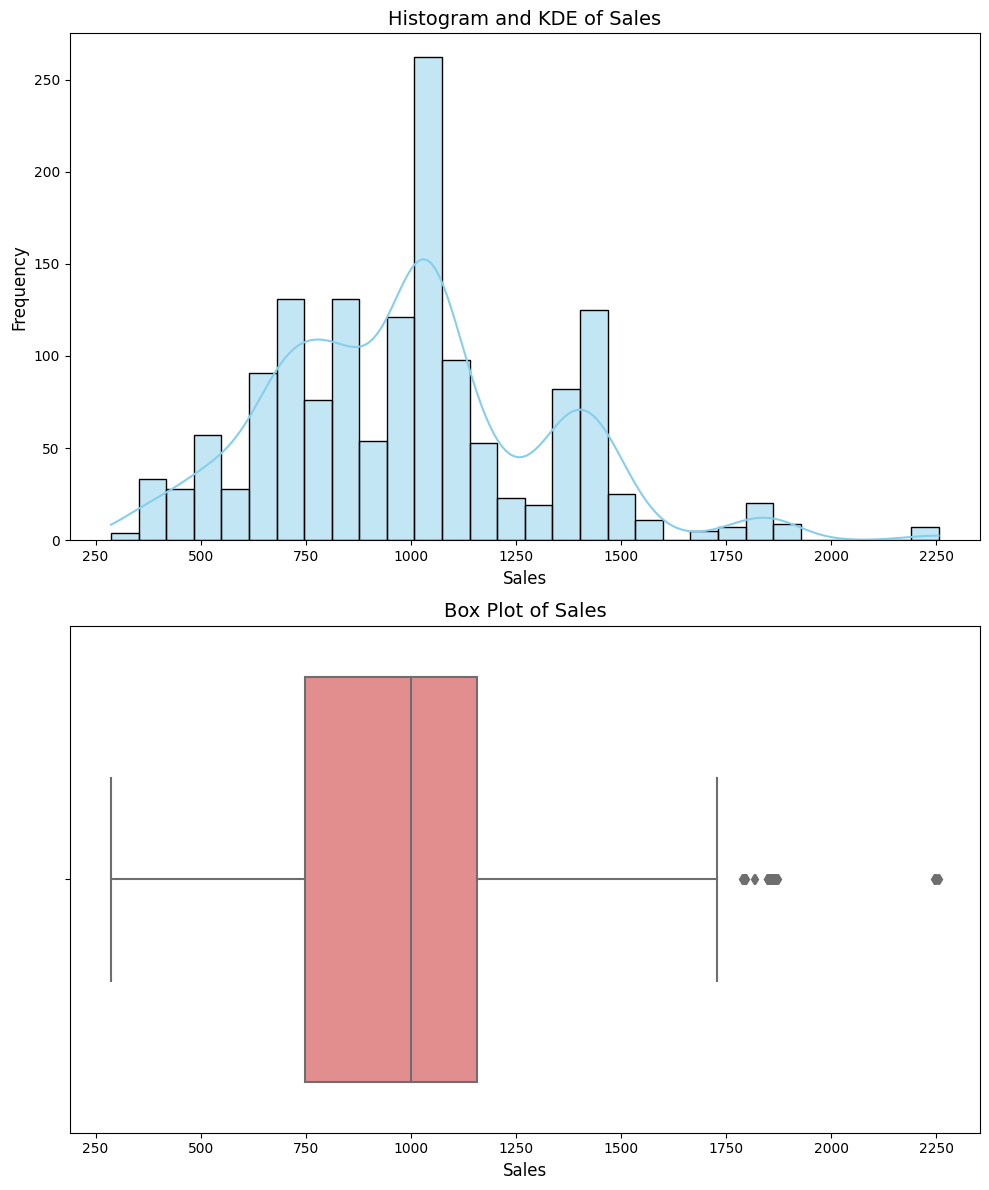

In [427]:
#file_path = 'output.xlsx'
#df = pd.read_excel(file_path)

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot a histogram and KDE for the sales data
sns.histplot(df['sales'], kde=True, ax=axes[0], bins=30, color='skyblue')
axes[0].set_title('Histogram and KDE of Sales', fontsize=14)
axes[0].set_xlabel('Sales', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Plot a box plot for the sales data
sns.boxplot(x=df['sales'], ax=axes[1], color='lightcoral')
axes[1].set_title('Box Plot of Sales', fontsize=14)
axes[1].set_xlabel('Sales', fontsize=12)

plt.tight_layout()
plt.show()


In [428]:
# Calculate skewness and kurtosis
skewness = skew(df['sales'])
kurtosis_value = kurtosis(df['sales'])

# Identify the mode (peak) of the distribution
mode_value = mode(df['sales'])[0][0]

print(f'skewness: {skewness} , kurtosis_value: {kurtosis_value}, mode_value: {mode_value}')

skewness: 0.5688145602566145 , kurtosis_value: 0.6464721366390691, mode_value: 1034.36


The histogram illustrates a leptokurtic and right-skewed distribution (skewness = 0.569 and kurtosis = 0.646) of sales, with a mode at 1034.36. Most sales cluster around $1,000, while outliers with significantly higher sales suggest possible impacts from certain products or events. Further analysis is required to extract more insights.

## Task 4

![purch_sales](purch_sales.png)


![purch_sales_2](purch_sales_2.png)


In the figures above, we observe that the sum of sales from repeat purchases is higher than that from non-repeat purchases. This trend suggests a possible satisfactory level of customer satisfaction, leading to higher repeat purchases. Further analysis is required to extract more insights.